In [10]:
import csv

f=open('LOCAL_PEOPLE_DONG_201912.csv',encoding='utf8')
data=csv.reader(f)
next(data)
data=list(data)

f2=open('dong_code.csv')
code_data=csv.reader(f2)
next(code_data)
next(code_data) #헤더가 두줄임
code_data=list(code_data)

print(len(data))
print(len(code_data))

315456
424


In [14]:
#데이터변환
for row in data:
    for i in range(1,32):
        if i<=2:
            row[i]=int(row[i])
        else:
            row[i]=float(row[i])
            
for row in code_data:
    row[1]=int(row[1])

print(data[0])
print(code_data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']
['1101053', 11110530, '서울', '종로구', '사직동']


In [17]:
dong_name=input('핫플레이스가 위치한 행정동을 입력하세요.-->')
for row in code_data:
    if row[-1] == dong_name:
        dong_code=row[1]        
print(dong_name,'-',dong_code,'를 분석합니다.')

핫플레이스가 위치한 행정동을 입력하세요.-->압구정동
압구정동 - 11680545 를 분석합니다.


핫플레이스가 위치한 행정동을 입력하세요.-->압구정동
압구정동 - 11680545 를 분석합니다.


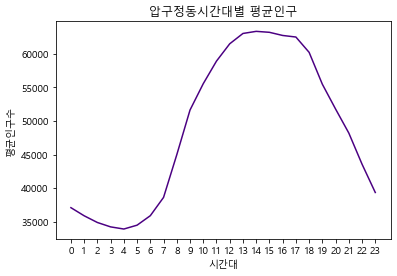

In [28]:
#시간대별 인구수
import matplotlib.pyplot as plt
import csv
#파일 읽기
f=open('LOCAL_PEOPLE_DONG_201912.csv',encoding='utf8')
data=csv.reader(f)
next(data)
data=list(data)

f2=open('dong_code.csv')
code_data=csv.reader(f2)
next(code_data)
next(code_data) #헤더가 두줄임
code_data=list(code_data)

#데이터 타입 변환
for row in data:
    for i in range(1,32):
        if i<=2:
            row[i]=int(row[i])
        else:
            row[i]=float(row[i])
#행정동코드 변환하기        
for row in code_data:
    row[1]=int(row[1])

#행정동명과 행정동코드 연결하기
dong_name=input('핫플레이스가 위치한 행정동을 입력하세요.-->')
for row in code_data:
    if row[-1] == dong_name:
        dong_code=row[1]        
print(dong_name,'-',dong_code,'를 분석합니다.')


population=[0 for i in range(24)] #리스트 내포
for row in data:
    if row[2]==dong_code:
        time,p=row[1],row[3]
        population[time]+=p
        
population=[p/31 for p in population] #사간대별 평균인구 구하기

plt.rc('font',family='Malgun Gothic')
plt.title(dong_name+'시간대별 평균인구')
plt.plot(range(24),population,color='indigo')
plt.xticks(range(24),range(24))    #x축 눈금
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

In [30]:
#요일 출력
import datetime
datetime.date(2019,12,15).weekday()

6

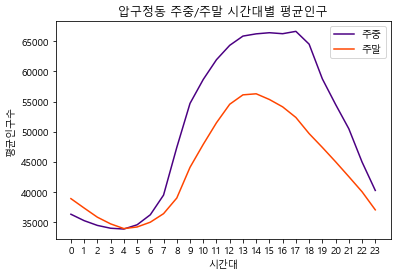

In [41]:
#주말/주중 시간대별 인구
import matplotlib.pyplot as plt

weekday=[0 for i in range(24)]
weekend=[0 for i in range(24)]

for row in data:
    if row[2]==dong_code:
        time,p=row[1],row[3]
        year,mon,day=int(row[0][:4]),int(row[0][4:6]),int(row[0][6:])
        num=datetime.date(year,mon,day).weekday() #주중/주말 구분
        if num<5: #주중이면
            weekday[time]+=p
        else:      #주말이면
            weekend[time]+=p
            
weekday_cnt,weekend_cnt=0,0  #일수 저장할 변수
for i in range(1,32): #12월 일수만큼 반복
    if datetime.date(2019,12,i).weekday()<5:  #주중이면 주중 일수에 1더하기
        weekday_cnt+=1
    else:           #주말이면 주말 일수에 1더하기
        weekend_cnt+=1
        
weekday=[w/weekday_cnt for w in weekday]       #주중 평균 인구 구하기     
weekend=[w/weekend_cnt for w in weekend]       #주말 평균 인구 구하기      

plt.rc('font',family='Malgun Gothic')
plt.title(dong_name+' 주중/주말 시간대별 평균인구')
plt.plot(weekday,color='indigo',label='주중')
plt.plot(weekend,color='orangered',label='주말')
plt.legend()
plt.xticks(range(24),range(24))    #x축 눈금
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

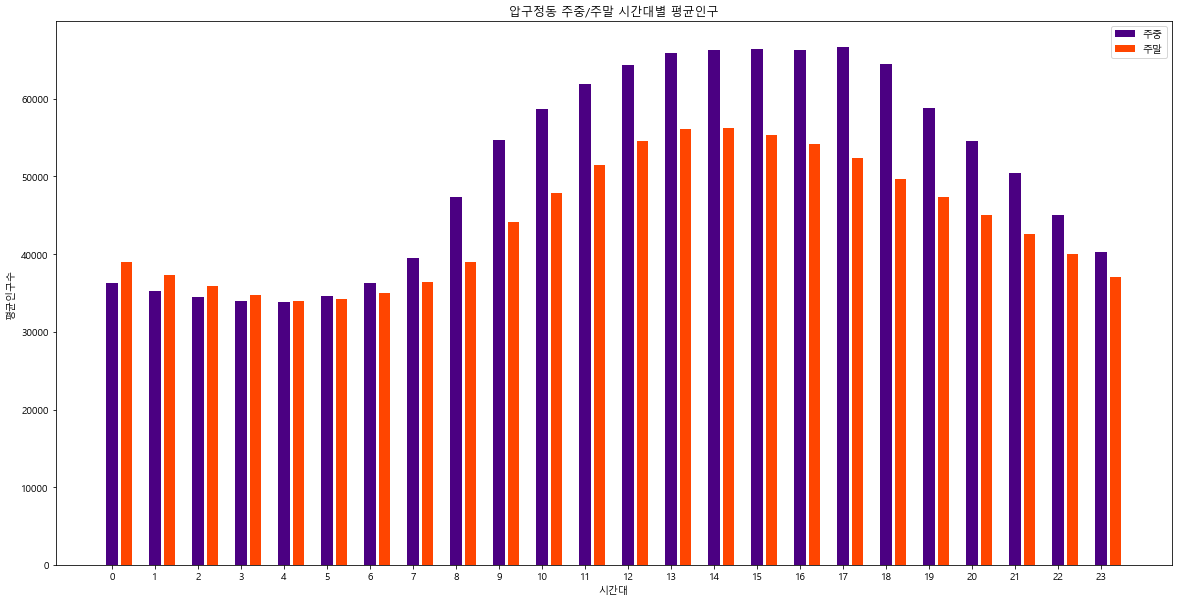

In [42]:
#주말/주중 시간대별 인구
import matplotlib.pyplot as plt

weekday=[0 for i in range(24)]
weekend=[0 for i in range(24)]

for row in data:
    if row[2]==dong_code:
        time,p=row[1],row[3]
        year,mon,day=int(row[0][:4]),int(row[0][4:6]),int(row[0][6:])
        num=datetime.date(year,mon,day).weekday() #주중/주말 구분
        if num<5: #주중이면
            weekday[time]+=p
        else:      #주말이면
            weekend[time]+=p
            
weekday_cnt,weekend_cnt=0,0  #일수 저장할 변수
for i in range(1,32): #12월 일수만큼 반복
    if datetime.date(2019,12,i).weekday()<5:  #주중이면 주중 일수에 1더하기
        weekday_cnt+=1
    else:           #주말이면 주말 일수에 1더하기
        weekend_cnt+=1
        
weekday=[w/weekday_cnt for w in weekday]       #주중 평균 인구 구하기     
weekend=[w/weekend_cnt for w in weekend]       #주말 평균 인구 구하기      

plt.figure(figsize=(20,10)) #크기 키우기
plt.rc('font',family='Malgun Gothic')
plt.title(dong_name+' 주중/주말 시간대별 평균인구')
plt.bar(range(0,72,3),weekday,color='indigo',label='주중')      #0부터 72까지 3간격
plt.bar(range(1,73,3),weekend,color='orangered',label='주말')    #1부터 73까지 3간격->주중 옆에 주말이 붙어서 출력됨. 따라서 시작과 종료에 +1
plt.legend()
plt.xticks(range(0,72,3),range(24))    #x축 눈금
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

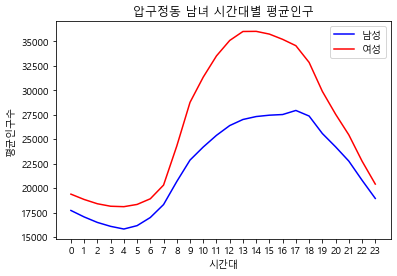

In [43]:
#남녀 시간대별 평균인구
import matplotlib.pyplot as plt

male=[0 for i in range(24)]
female=[0 for i in range(24)]

for row in data:
    if row[2]==dong_code:
        time=row[1]  #시간대를 변수에 저장
        male[time]+=sum(row[4:18])   #남성 인구 총합
        female[time]+=sum(row[18:32])   #여성 인구 총합
#시간대별 평균 인구 구하기
male=[m/31 for m in male]
female=[f/31 for f in female]

plt.rc('font',family='Malgun Gothic')
plt.title(dong_name+' 남녀 시간대별 평균인구')
plt.plot(male,color='b',label='남성')      #0부터 72까지 3간격
plt.plot(female,color='r',label='여성')    #1부터 73까지 3간격->주중 옆에 주말이 붙어서 출력됨. 따라서 시작과 종료에 +1
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24),range(24))    #x축 눈금
plt.show()

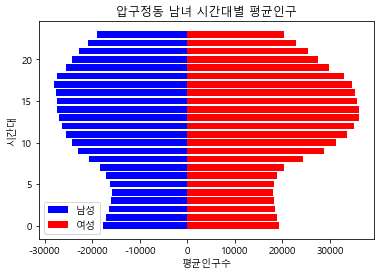

In [48]:
#남녀 시간대별 평균인구
import matplotlib

male=[0 for i in range(24)]
female=[0 for i in range(24)]

for row in data:
    if row[2]==dong_code:
        time=row[1]  #시간대를 변수에 저장
        male[time]+=sum(row[4:18])   #남성 인구 총합
        female[time]+=sum(row[18:32])   #여성 인구 총합
#시간대별 평균 인구 구하기        
male=[m/31 for m in male]
female=[f/31 for f in female]

#음수처리
male=[-m for m in male]
matplotlib.rcParams['axes.unicode_minus']=False

plt.rc('font',family='Malgun Gothic')
plt.title(dong_name+' 남녀 시간대별 평균인구')
plt.barh(range(24),male,color='b',label='남성')      #0부터 72까지 3간격
plt.barh(range(24),female,color='r',label='여성')    #1부터 73까지 3간격->주중 옆에 주말이 붙어서 출력됨. 따라서 시작과 종료에 +1
plt.legend()
plt.ylabel('시간대')
plt.xlabel('평균인구수')
plt.show()

핫플레이스가 위치한 행정동을 입력하세요.-->압구정동
핫플레이스가 위치한 행정동을 입력하세요.-->역삼2동


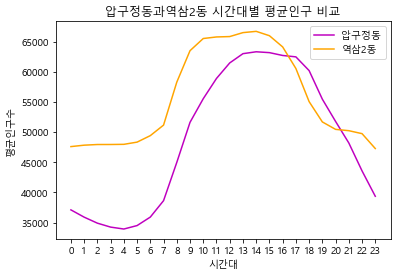

In [50]:
import matplotlib.pyplot as plt

dong_name=input('핫플레이스가 위치한 행정동을 입력하세요.-->')
for row in code_data:
    if row[-1] == dong_name:
        dong_code=row[1]        
        
#비교할 행정동
dong_name2=input('핫플레이스가 위치한 행정동을 입력하세요.-->')
for row in code_data:
    if row[-1] == dong_name2:
        dong_code2=row[1]        

population=[0 for i in range(24)]
population2=[0 for i in range(24)]

for row in data:
    if row[2]==dong_code:
        time,p=row[1],row[3]
        population[time]+=p
    elif row[2]==dong_code2:  #비교할 행정동인 경우
        time,p=row[1],row[3]
        population2[time]+=p
        
population=[w/31 for w in population]         
population2=[w/31 for w in population2]        

plt.rc('font',family='Malgun Gothic')
plt.title(dong_name+'과'+dong_name2+' 시간대별 평균인구 비교')
plt.plot(population,color='m',label=dong_name)     
plt.plot(population2,color='orange',label=dong_name2)  
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24),range(24))    #x축 눈금
plt.show()